In [2]:
import pandas as pd

In [3]:
df= pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [7]:
df.loc[0, 'account']




{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [8]:
account_df = pd.json_normalize(df['account'])


In [9]:
df = pd.concat([df.drop(columns=['account']), account_df], axis=1)


In [10]:
df.columns



Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [11]:
# Criar um DataFrame sem as colunas aninhadas
df_check = df.drop(columns=['customer', 'phone', 'internet'])

# Agora verificar duplicatas
print("Duplicatas totais (sem colunas aninhadas):")
print(df_check.duplicated().sum())



Duplicatas totais (sem colunas aninhadas):
0


In [12]:
for col in ['Churn', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    print(f"\nValores únicos em {col}:")
    print(df[col].value_counts(dropna=False))



Valores únicos em Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Valores únicos em Contract:
Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

Valores únicos em PaperlessBilling:
PaperlessBilling
Yes    4311
No     2956
Name: count, dtype: int64

Valores únicos em PaymentMethod:
PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64


In [13]:
df['Churn'] = df['Churn'].str.strip()


In [14]:
print(df['Churn'].value_counts(dropna=False))


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [15]:
df = df[df['Churn'] != '']


In [16]:
print(df['Churn'].value_counts(dropna=False))


Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [17]:
for col in ['Contract', 'PaperlessBilling', 'PaymentMethod']:
    df[col] = df[col].str.strip()


In [18]:
for col in ['Contract', 'PaperlessBilling', 'PaymentMethod']:
    print(f"\nValores únicos em {col}:")
    print(df[col].value_counts(dropna=False))



Valores únicos em Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Valores únicos em PaperlessBilling:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

Valores únicos em PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [19]:
print(df.dtypes)


customerID           object
Churn                object
customer             object
phone                object
internet             object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [20]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nValores únicos em {col}:")
    print(df[col].value_counts(dropna=False))



Valores únicos em customerID:
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64

Valores únicos em Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Valores únicos em customer:
customer
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}         215
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}       186
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}     76
{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 72}       75
{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 2}        73
                                                                                                ... 
{'gender': 'Fema

In [21]:
df['Contas_Diarias'] = df['Charges.Monthly'] / 30


In [22]:
df[['Charges.Monthly', 'Contas_Diarias']].head()


,Charges.Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [23]:
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [24]:
df[['Churn', 'Churn_bin']].head()


,Churn,Churn_bin
0,No,0
1,No,0
2,Yes,1
3,Yes,1
4,Yes,1


In [25]:
df = df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao',
    'Churn_bin': 'Evasao_Binario',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Faturamento_Sem_Papel',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Cobranca_Mensal',
    'Charges.Total': 'Cobranca_Total',
    'Contas_Diarias': 'Cobranca_Diaria'
})


In [26]:
df['Contrato'] = df['Contrato'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Um ano',
    'Two year': 'Dois anos'
})


In [27]:
df['Metodo_Pagamento'] = df['Metodo_Pagamento'].replace({
    'Electronic check': 'Cheque Eletrônico',
    'Mailed check': 'Cheque por Correio',
    'Bank transfer (automatic)': 'Transferência Bancária',
    'Credit card (automatic)': 'Cartão de Crédito'
})


In [28]:
df[['Contrato', 'Metodo_Pagamento']].head()


,Contrato,Metodo_Pagamento
0,Um ano,Cheque por Correio
1,Mensal,Cheque por Correio
2,Mensal,Cheque Eletrônico
3,Mensal,Cheque Eletrônico
4,Mensal,Cheque por Correio


In [29]:
print(df.select_dtypes(include=['float64', 'int64']).columns)


Index(['Cobranca_Mensal', 'Cobranca_Diaria', 'Evasao_Binario'], dtype='object')


In [30]:
df[['Cobranca_Mensal', 'Cobranca_Diaria', 'Evasao_Binario']].describe()


,Cobranca_Mensal,Cobranca_Diaria,Evasao_Binario
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2.158723,0.265370
std,30.090047,1.003002,0.441561
min,18.250000,0.608333,0.000000
25%,35.500000,1.183333,0.000000
50%,70.350000,2.345000,0.000000
75%,89.850000,2.995000,1.000000
max,118.750000,3.958333,1.000000


#Distribuição da Evasão

In [31]:
df['Evasao'].value_counts()


,count
Evasao,
No,5174
Yes,1869


In [32]:
df['Evasao'].value_counts(normalize=True) * 100


,proportion
Evasao,
No,73.463013
Yes,26.536987


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


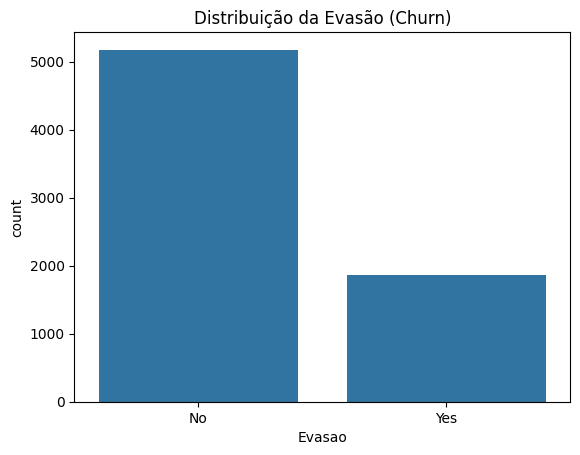

In [34]:
sns.countplot(x='Evasao', data=df)
plt.title('Distribuição da Evasão (Churn)')
plt.show()

# Contagem de Evasão por Variáveis Categóricas

In [35]:
df['Contrato'].value_counts()


,count
Contrato,
Mensal,3875
Dois anos,1695
Um ano,1473


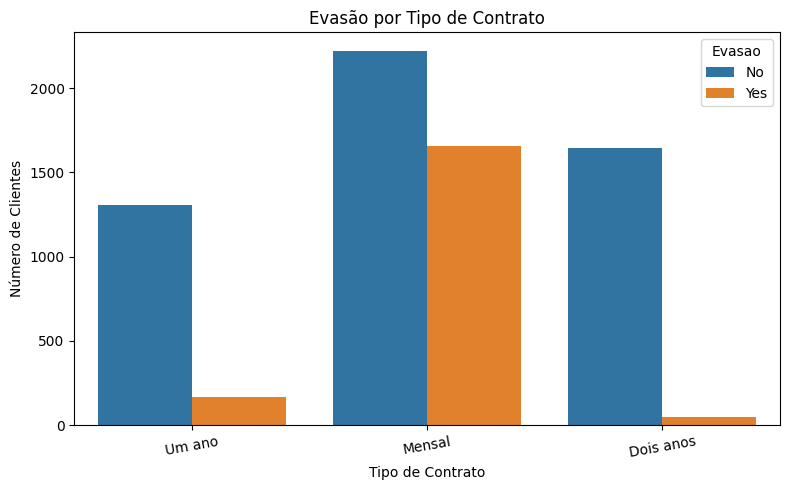

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contrato', hue='Evasao')
plt.title('Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


In [37]:
pd.crosstab(df['Contrato'], df['Evasao'], normalize='index') * 100


Evasao,No,Yes
Contrato,,
Dois anos,97.168142,2.831858
Mensal,57.290323,42.709677
Um ano,88.730482,11.269518


In [38]:
df['Metodo_Pagamento'].value_counts()


,count
Metodo_Pagamento,
Cheque Eletrônico,2365
Cheque por Correio,1612
Transferência Bancária,1544
Cartão de Crédito,1522


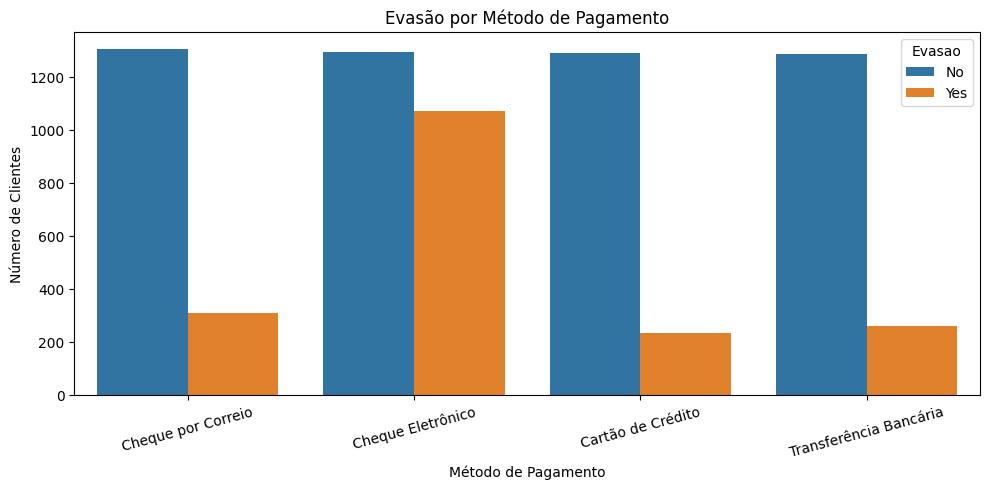

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Metodo_Pagamento', hue='Evasao')
plt.title('Evasão por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [40]:
df['Faturamento_Sem_Papel'].value_counts()


,count
Faturamento_Sem_Papel,
Yes,4171
No,2872


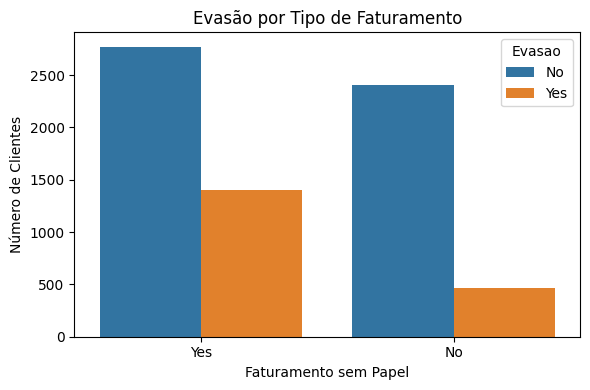

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Faturamento_Sem_Papel', hue='Evasao')
plt.title('Evasão por Tipo de Faturamento')
plt.xlabel('Faturamento sem Papel')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()


# Contagem de Evasão por Variáveis Numéricas

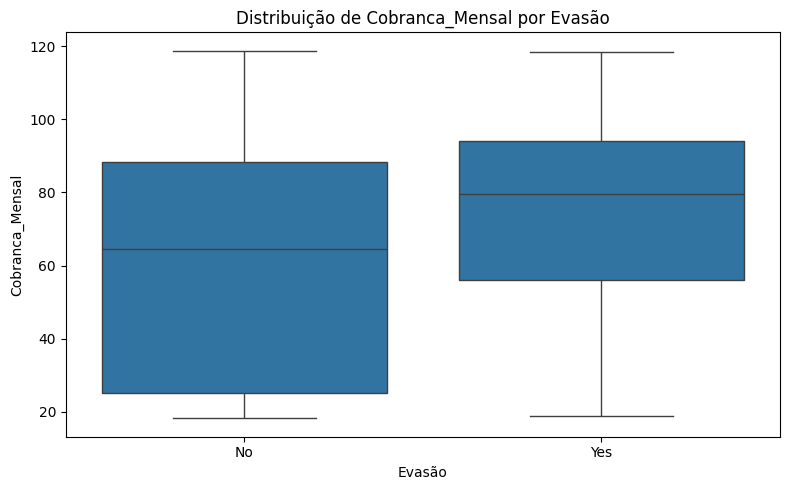

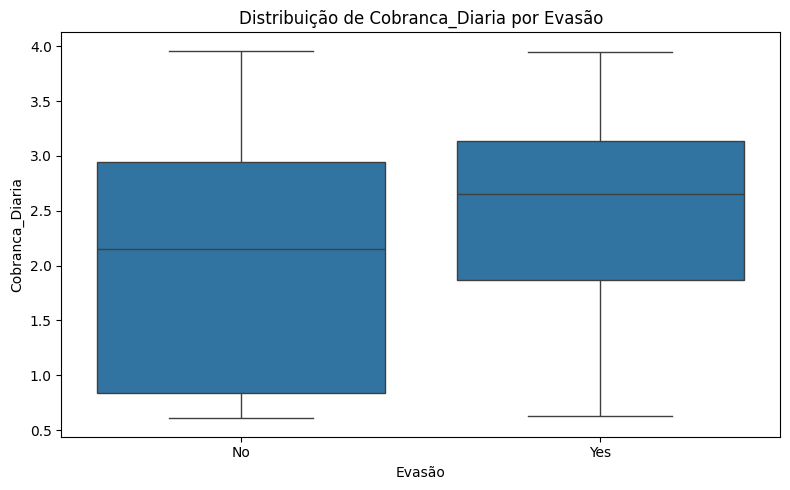

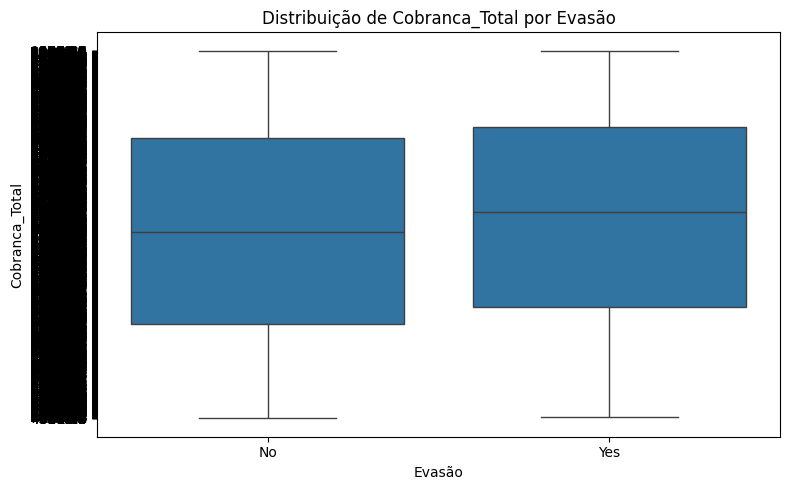

In [45]:
numerical_cols = ['Cobranca_Mensal', 'Cobranca_Diaria', 'Cobranca_Total']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='Evasao', y=col)
    plt.title(f'Distribuição de {col} por Evasão')
    plt.xlabel('Evasão')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Relatório Final

## Introdução

O objetivo deste projeto é analisar o comportamento de clientes de uma empresa de telecomunicações com foco na evasão de clientes (churn).
A evasão representa a perda de clientes ao longo do tempo e é um grande desafio para empresas que dependem de contratos recorrentes.

Este estudo busca responder:

Quais características estão mais associadas à evasão?

Como os dados de cobrança e perfil impactam no cancelamento?

Que padrões podemos identificar para criar estratégias de retenção?

## Limpeza e Tratamento de Dados

Nesta seção, descrevemos as etapas de limpeza e tratamento dos dados realizadas:

1. **Carregamento dos Dados:** Os dados foram carregados a partir de um arquivo JSON.
2. **Normalização de Colunas Aninhadas:** As colunas aninhadas 'account' foram normalizadas e integradas ao DataFrame principal.
3. **Verificação e Tratamento de Valores Ausentes:** Foi verificado que não havia valores nulos no dataset.
4. **Verificação de Duplicatas:** Foi verificado que não havia linhas duplicadas no dataset.
5. **Tratamento de Valores Vazios na Coluna 'Churn':** Foi identificado que a coluna 'Churn' continha valores vazios (''). Esses valores foram removidos do DataFrame.
6. **Remoção de Espaços em Branco:** Espaços em branco no início e no final dos valores nas colunas 'Churn', 'Contract', 'PaperlessBilling' e 'PaymentMethod' foram removidos.
7. **Criação de Coluna 'Contas_Diarias':** Uma nova coluna 'Contas_Diarias' foi criada dividindo 'Charges.Monthly' por 30 para obter a cobrança diária aproximada.
8. **Criação de Coluna 'Churn_bin':** Uma coluna binária 'Churn_bin' foi criada mapeando 'Yes' para 1 e 'No' para 0 na coluna 'Churn'.
9. **Renomeação de Colunas:** As colunas foram renomeadas para o português para maior clareza.
10. **Tradução de Valores Categóricos:** Os valores nas colunas 'Contrato' e 'Metodo_Pagamento' foram traduzidos para o português.

## Análise Exploratória de Dados

A análise exploratória de dados revelou insights importantes sobre as características dos clientes e sua relação com a evasão:

*   **Distribuição da Evasão:** Aproximadamente 26.5% dos clientes na base de dados apresentaram evasão.

*   **Evasão por Tipo de Contrato:** Clientes com contrato mensal ('Mensal') apresentam uma taxa de evasão significativamente maior (42.7%) em comparação com contratos de um ano (11.3%) e dois anos (2.8%).

*   **Evasão por Método de Pagamento:** Clientes que utilizam 'Cheque Eletrônico' como método de pagamento demonstram uma taxa de evasão maior do que aqueles que utilizam outros métodos.

*   **Evasão por Faturamento sem Papel:** Clientes que optam por 'Faturamento sem Papel' ('Yes') têm uma taxa de evasão mais alta do que aqueles que não utilizam este serviço.

*   **Distribuição de Cobranças por Evasão:** As distribuições das cobranças mensais e diárias mostram que clientes que evadiram ('Yes') tendem a ter cobranças mensais e diárias medianas mais altas do que clientes que não evadiram ('No'). A coluna 'Cobranca_Total' apresenta muitos valores "0" ou em branco, o que pode indicar problemas de preenchimento ou um viés na coleta desses dados.

## Conclusões e Insights

Com base na análise exploratória, podemos concluir que diversos fatores estão associados à evasão de clientes:

*   **Contratos:** Clientes com contratos de curta duração, especialmente mensais, são mais propensos a cancelar o serviço.
*   **Método de Pagamento:** O uso de cheque eletrônico está associado a uma maior probabilidade de evasão.
*   **Faturamento:** Clientes que optam pelo faturamento sem papel também apresentam uma tendência maior à evasão.
*   **Cobranças:** Cobranças mensais e diárias mais altas parecem estar relacionadas a uma maior taxa de evasão. A qualidade dos dados na coluna 'Cobranca_Total' é questionável e precisa ser investigada.

Esses insights sugerem que clientes com maior flexibilidade (contratos mensais), que utilizam métodos de pagamento menos tradicionais (cheque eletrônico) e que têm cobranças mais elevadas têm uma maior propensão a evadir.

## Recomendações

Para reduzir a evasão de clientes, recomendamos as seguintes ações baseadas nesta análise:

1.  **Foco em Clientes com Contratos Mensais:** Desenvolver programas de fidelidade e ofertas especiais para incentivar a migração de clientes com contratos mensais para contratos de maior duração (um ou dois anos).
2.  **Incentivo a Outros Métodos de Pagamento:** Promover o uso de transferência bancária e cartão de crédito com benefícios ou descontos para desencorajar o uso de cheque eletrônico.
3.  **Análise do Faturamento Sem Papel:** Investigar os motivos pelos quais clientes que optam pelo faturamento sem papel têm maior evasão. Pode ser necessário melhorar a experiência do usuário com este serviço ou oferecer mais opções de faturamento.
4.  **Análise de Cobranças Elevadas:** Realizar uma análise mais aprofundada dos clientes com cobranças mensais e diárias elevadas para entender se há insatisfação com o custo-benefício ou problemas com o serviço que levam à evasão.
5.  **Investigação da Coluna 'Cobranca_Total':** É fundamental investigar os valores "0" ou em branco na coluna 'Cobranca_Total' para garantir a integridade dos dados e possibilitar análises mais precisas sobre o impacto da cobrança total na evasão.

A implementação dessas recomendações pode ajudar a empresa a reter clientes e reduzir a taxa de evasão, contribuindo para o crescimento e a sustentabilidade do negócio.

# Extra: Análise de Correlação entre Variáveis

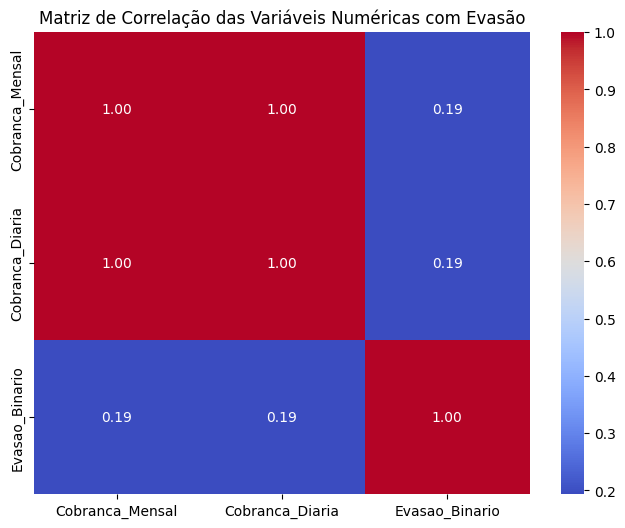

In [46]:
correlation_matrix = df[['Cobranca_Mensal', 'Cobranca_Diaria', 'Evasao_Binario']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas com Evasão')
plt.show()